In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from statsmodels.api import qqplot
from statsmodels.graphics.regressionplots import influence_plot, plot_regress_exog
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')

In [39]:
df = pd.read_csv(r"D:\ExcelR\Data Science\Assignments\Multiple Linear Regression\ToyotaCorolla.csv", encoding='cp1252')
df

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


# EDA

In [40]:
columns_to_keep = ["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]
df = df[columns_to_keep]
df

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


### Checking for duplicates

In [41]:
df[df.duplicated()]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [42]:
df = df.drop_duplicates()
df[df.duplicated()]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight


In [43]:
df.rename(columns={'Age_08_04':'Age'}, inplace=True)
df

,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [44]:
df.describe()

,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,1576.560976,4.032753,5.026481,87.020209,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,424.387533,0.952667,0.188575,40.959588,52.251882
min,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,16000.000000,5.000000,6.000000,283.000000,1615.000000


<AxesSubplot:>

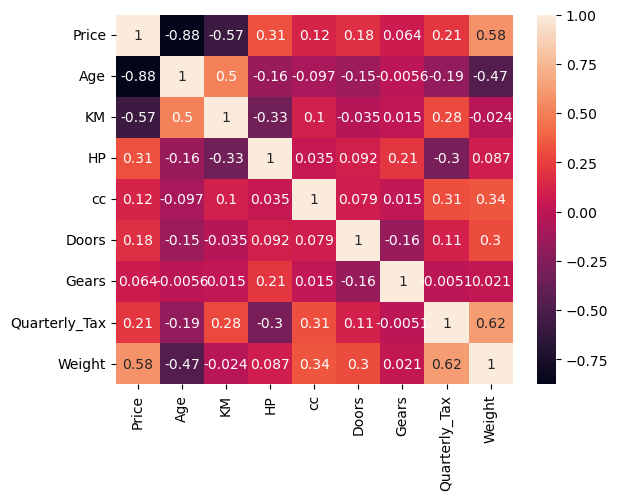

In [45]:
sns.heatmap(df.corr(), annot=True)

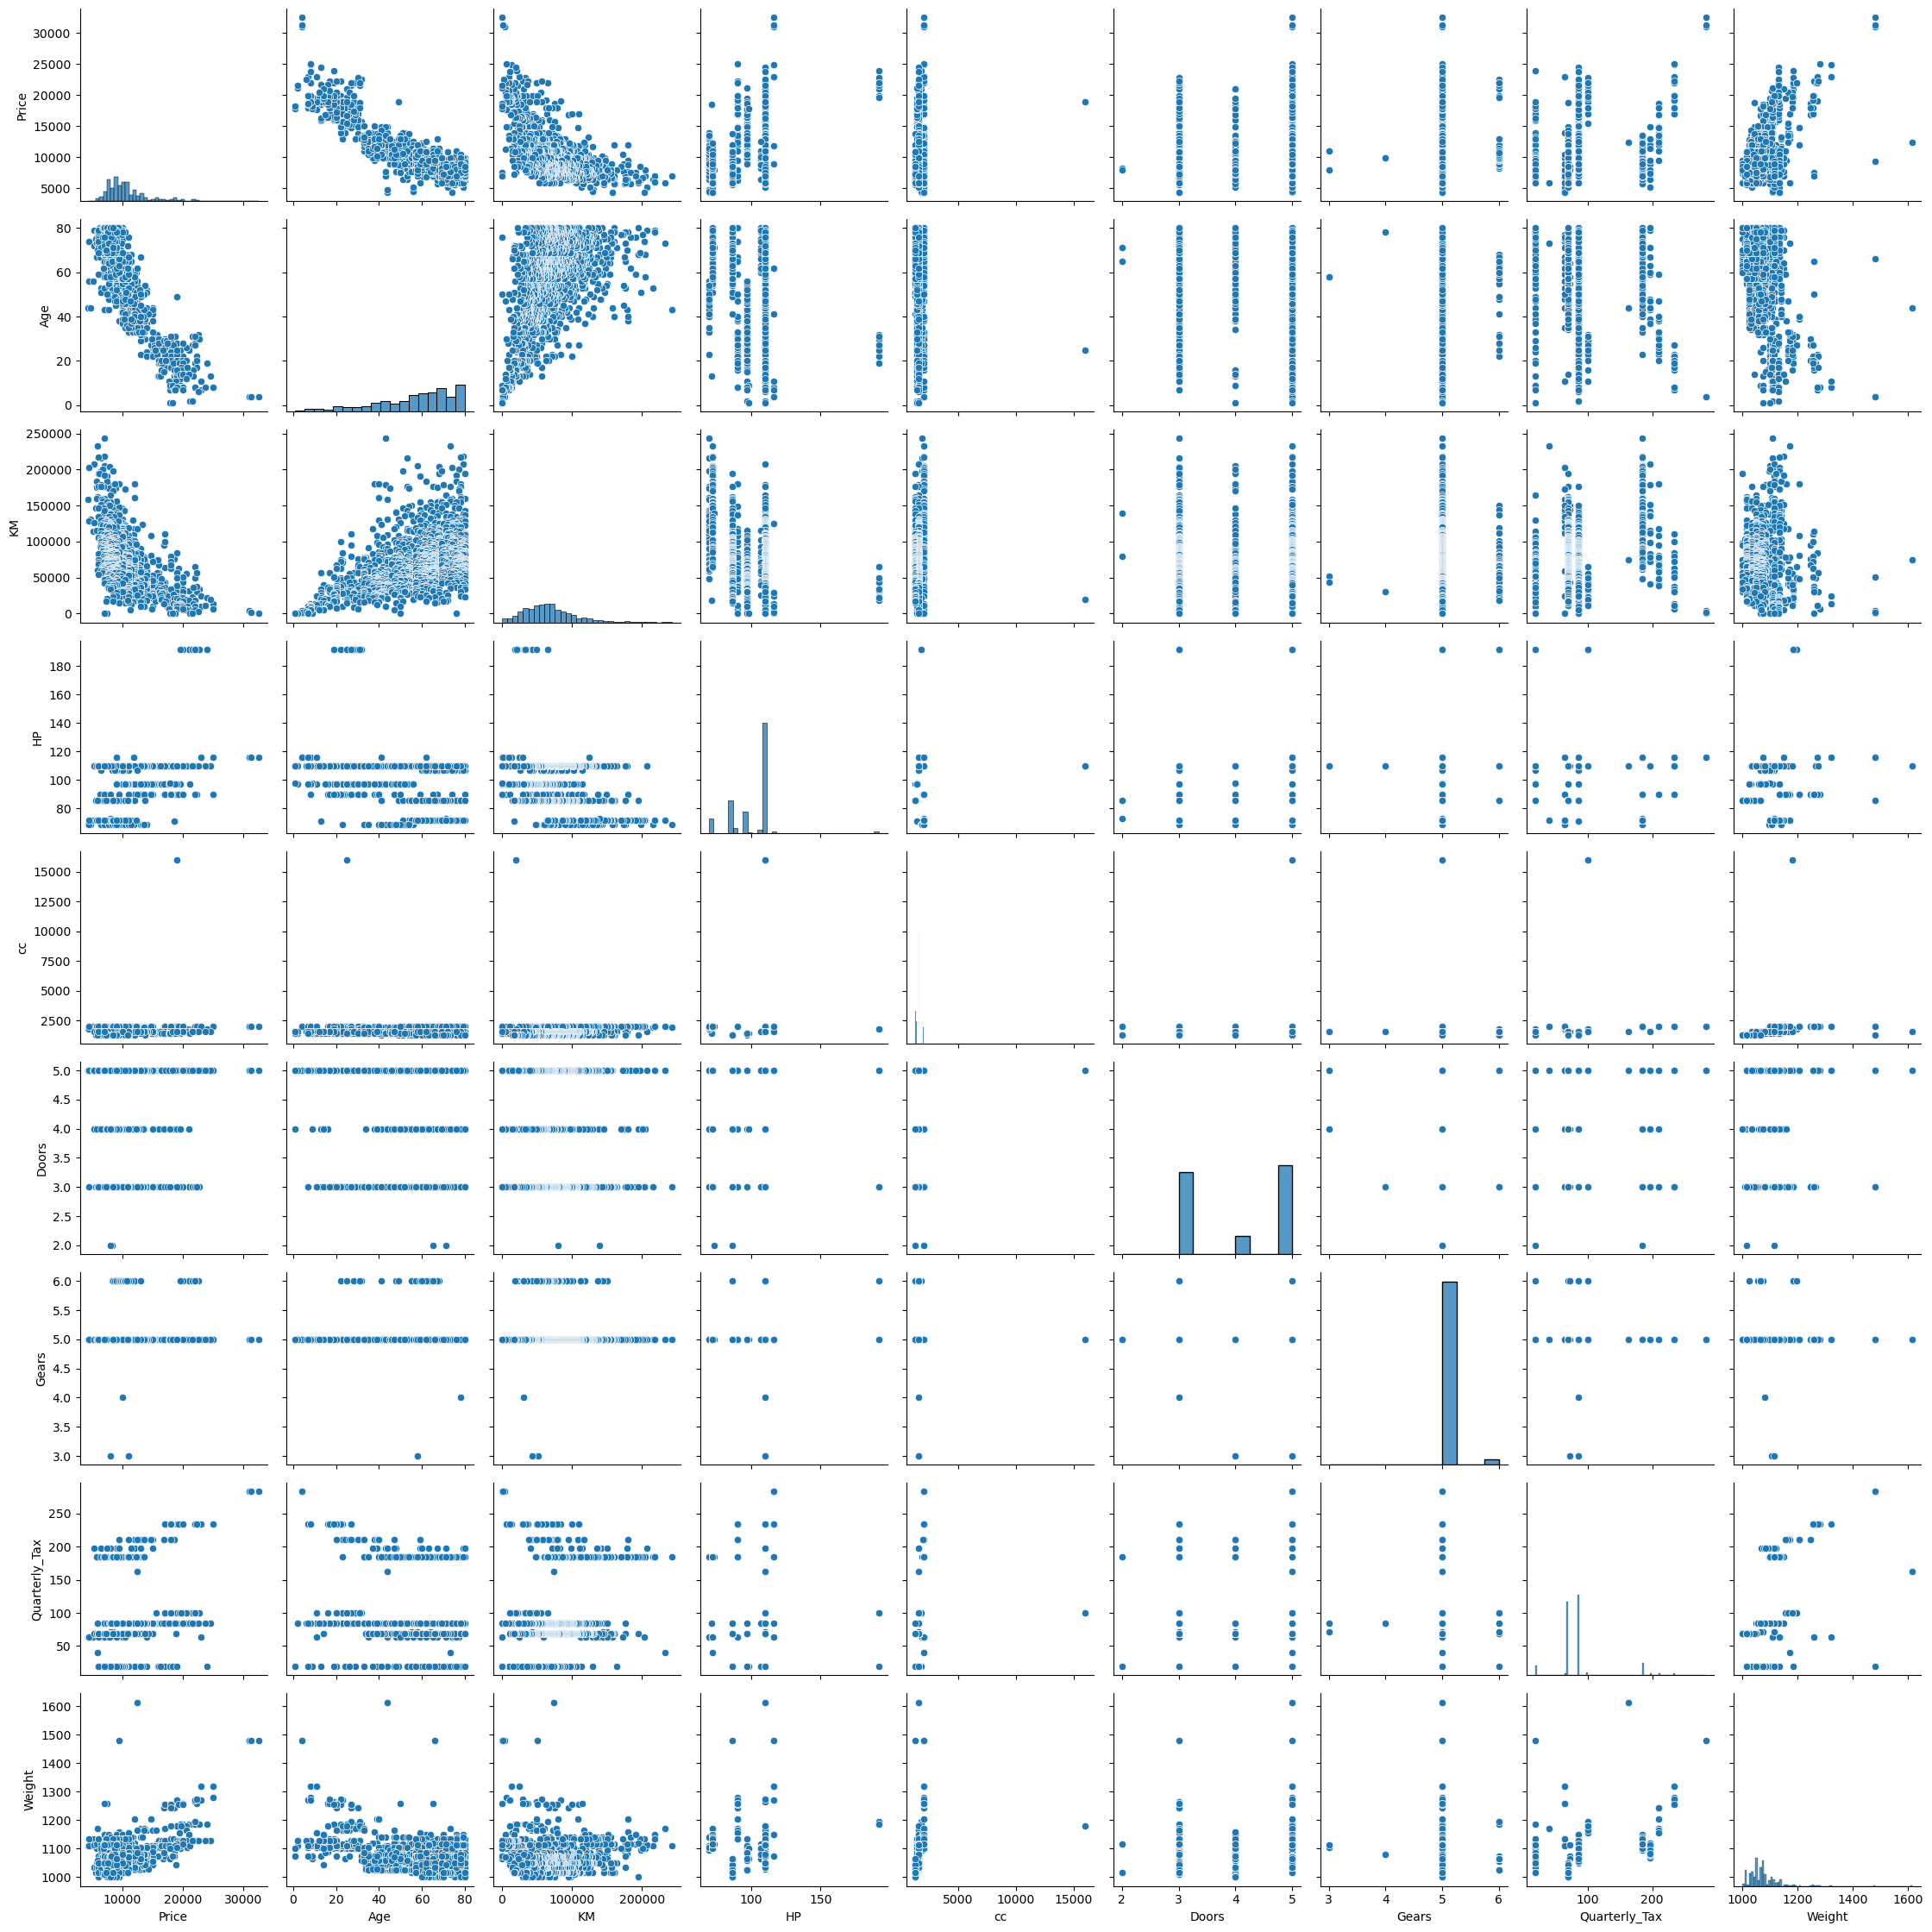

In [46]:
sns.pairplot(df)
plt.tight_layout()

# Model Building

In [47]:
model = smf.ols('Price~Age+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight', data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Fri, 13 Jan 2023   Prob (F-statistic):               0.00
Time:                        15:05:22   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
Age            -121.7139      2.615    -46.552      0.000    -126.843    -116.585
KM               -0.0207      0.001    -16.552      0.000      -0.023      -0.018
HP               31.5846      2.818     11.210      0.000      26.058      37.112
cc               -0.1186      0.090     -1.316      0.188      -0.295       0.058
Doors            -0.9202     39.988     -0.023      0.982     -79.362      77.522
Gears           597.7159    196.969      3.035      0.002     211.335     984.097
Quarterly_Tax     3.8588      1.311      2.944      0.003       1.288       6.430
Weight           16.8555      1.069     15.761      0.000      14.758      18.953
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### We can see that pvalue for cc and Doors is > 0.05 which implies that the don't have any significance on the dependent variable
### Let's create SLR model with these 2 separately and find out

In [48]:
# Model with only CC
model_cc = smf.ols('Price~cc', data=df).fit()
model_cc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     22.52
Date:                Fri, 13 Jan 2023   Prob (F-statistic):           2.29e-06
Time:                        15:05:22   Log-Likelihood:                -13779.
No. Observations:                1435   AIC:                         2.756e+04
Df Residuals:                    1433   BIC:                         2.757e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9053.5368    363.894     24.880      0.000    8339.715    9767.359
cc             1.0576      0.223      4.745      0.000       0.620       1.495
==============================================================================
Omnibus:                      463.846   Durbin-Watson:                   0.269
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1386.822
Skew:                           1.645   Prob(JB):                    7.17e-302
Kurtosis:                       6.518   Cond. No.                     6.28e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### pvalue for CC < 0.05

In [49]:
# Model with only doors
model_doors = smf.ols('Price~Doors', data=df).fit()
model_doors.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     49.99
Date:                Fri, 13 Jan 2023   Prob (F-statistic):           2.40e-12
Time:                        15:05:22   Log-Likelihood:                -13765.
No. Observations:                1435   AIC:                         2.753e+04
Df Residuals:                    1433   BIC:                         2.755e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7916.1452    407.596     19.422      0.000    7116.596    8715.694
Doors        695.4978     98.366      7.071      0.000     502.541     888.454
==============================================================================
Omnibus:                      465.543   Durbin-Watson:                   0.289
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1403.980
Skew:                           1.647   Prob(JB):                    1.35e-305
Kurtosis:                       6.554   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### pvalue for Doors < 0.05

In [50]:
# Model with Doors and CC 
cc_doors = smf.ols('Price~Doors+cc', data=df).fit()
cc_doors.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     34.40
Date:                Fri, 13 Jan 2023   Prob (F-statistic):           2.55e-15
Time:                        15:05:22   Log-Likelihood:                -13756.
No. Observations:                1435   AIC:                         2.752e+04
Df Residuals:                    1432   BIC:                         2.753e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6568.3395    513.700     12.786      0.000    5560.655    7576.024
Doors        662.3187     98.089      6.752      0.000     469.906     854.732
cc             0.9398      0.220      4.268      0.000       0.508       1.372
==============================================================================
Omnibus:                      448.494   Durbin-Watson:                   0.291
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1297.612
Skew:                           1.602   Prob(JB):                    1.69e-282
Kurtosis:                       6.382   Cond. No.                     9.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Since pvalue for both the features are < 0.05 we can conclude that the have significant slope

# Model validation
## Two Techniques 1. Collinearity check 2. Residual analysis

### 1. Collinearity Check

In [51]:
# If VIF > 20 there is multicollinearity else no multicollinearity
# VIF = 1 / (1 - r_squared)
df.columns
age_r = smf.ols('Age~KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight', data=df).fit().rsquared
vif_age = 1 / (1-age_r)

km_r = smf.ols('KM~Age+HP+cc+Doors+Gears+Quarterly_Tax+Weight', data=df).fit().rsquared
vif_km = 1 / (1-km_r)

hp_r = smf.ols('HP~KM+Age+cc+Doors+Gears+Quarterly_Tax+Weight', data=df).fit().rsquared
vif_hp = 1 / (1-hp_r)

cc_r = smf.ols('cc~KM+HP+Age+Doors+Gears+Quarterly_Tax+Weight', data=df).fit().rsquared
vif_cc = 1 / (1-cc_r)

doors_r = smf.ols('Doors~KM+HP+cc+Age+Gears+Quarterly_Tax+Weight', data=df).fit().rsquared
vif_doors = 1 / (1-doors_r)

gears_r = smf.ols('Gears~KM+HP+cc+Doors+Age+Quarterly_Tax+Weight', data=df).fit().rsquared
vif_gears = 1 / (1-gears_r)

tax_r = smf.ols('Quarterly_Tax~KM+HP+cc+Doors+Gears+Age+Weight', data=df).fit().rsquared
vif_tax = 1 / (1-tax_r)

weight_r = smf.ols('Weight~KM+HP+cc+Doors+Gears+Quarterly_Tax+Age', data=df).fit().rsquared
vif_weigt = 1 / (1-weight_r)

In [52]:
vifs_df = pd.DataFrame({'Features': df.columns[1:], 'VIF':[vif_age, vif_km, vif_hp, vif_cc, vif_doors, vif_gears, vif_tax, vif_weigt]})
vifs_df

,Features,VIF
0,Age,1.876236
1,KM,1.757178
2,HP,1.419180
3,cc,1.163470
4,Doors,1.155890
5,Gears,1.098843
6,Quarterly_Tax,2.295375
7,Weight,2.487180


### Since VIF < 20 there is no collinearity in the data

### 2. Residual Analysis

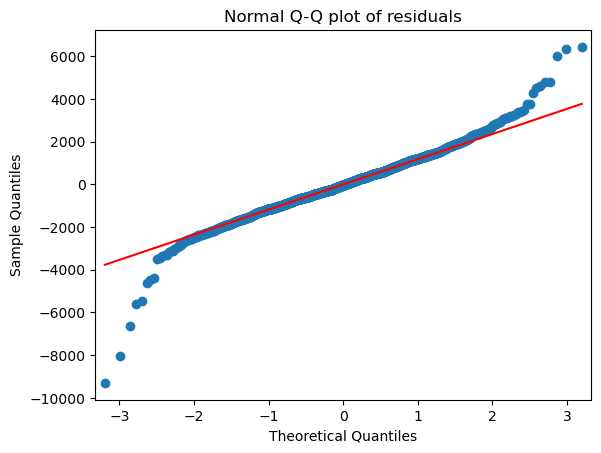

In [53]:
qqplot(model.resid, line='q')
plt.title('Normal Q-Q plot of residuals')
plt.show()

In [54]:
np.where(model.resid > 6000), np.where(model.resid < -6000)

((array([109, 146, 522], dtype=int64),),
 (array([220, 600, 959], dtype=int64),))

Text(0, 0.5, 'Residual Values')

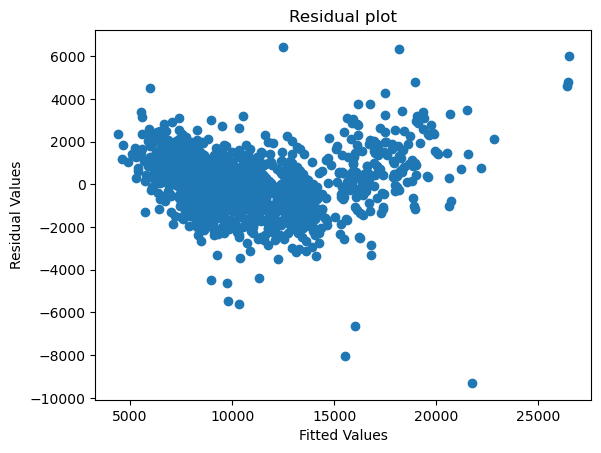

In [55]:
# Test for Homoscedasticity
plt.scatter(model.fittedvalues, model.resid)
plt.title('Residual plot')
plt.xlabel('Fitted Values')
plt.ylabel('Residual Values')

eval_env: 1


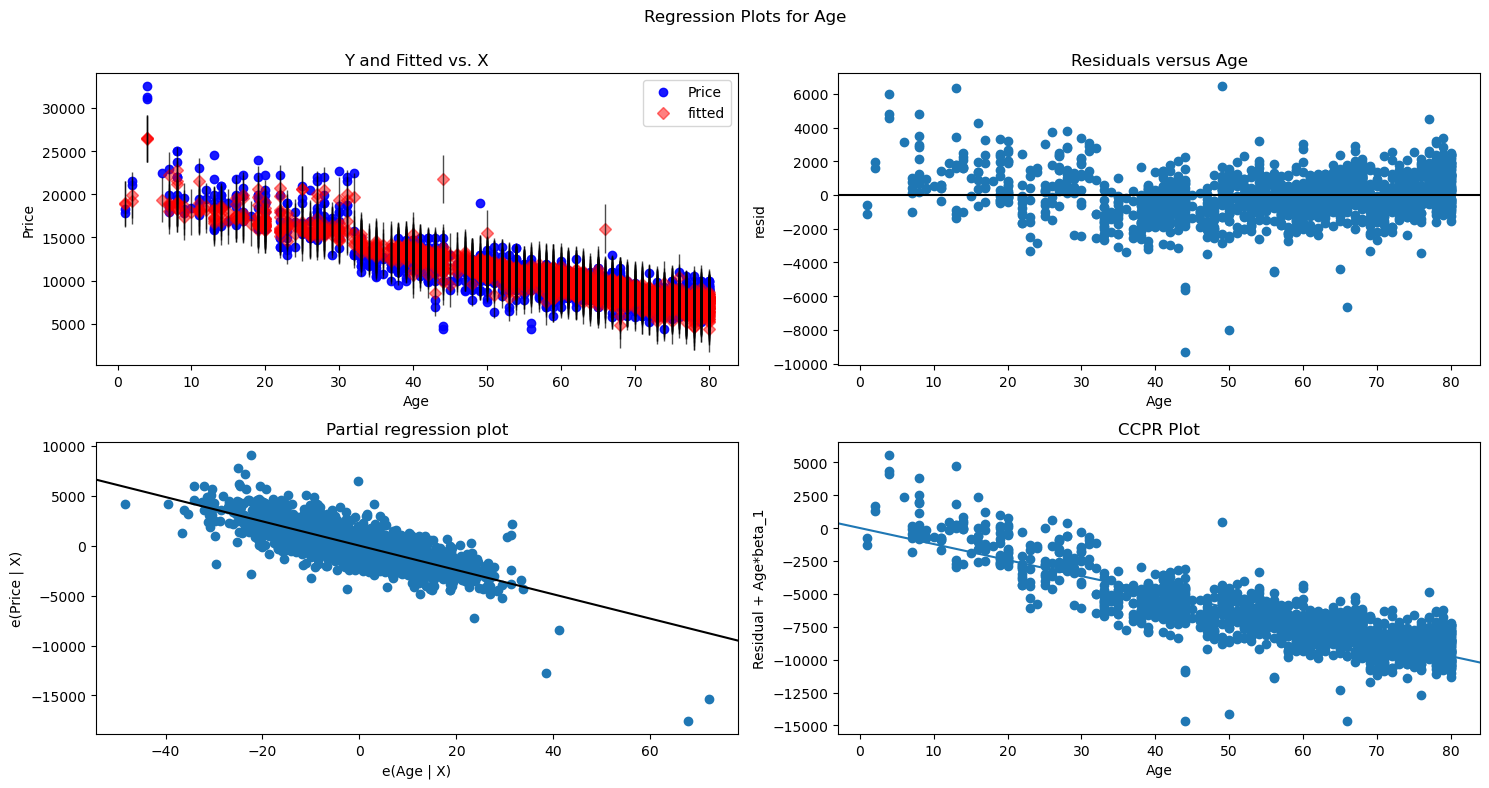

In [56]:
fig = plt.figure(figsize=(15, 8))
plot_regress_exog(model, 'Age', fig=fig)
plt.show()

eval_env: 1


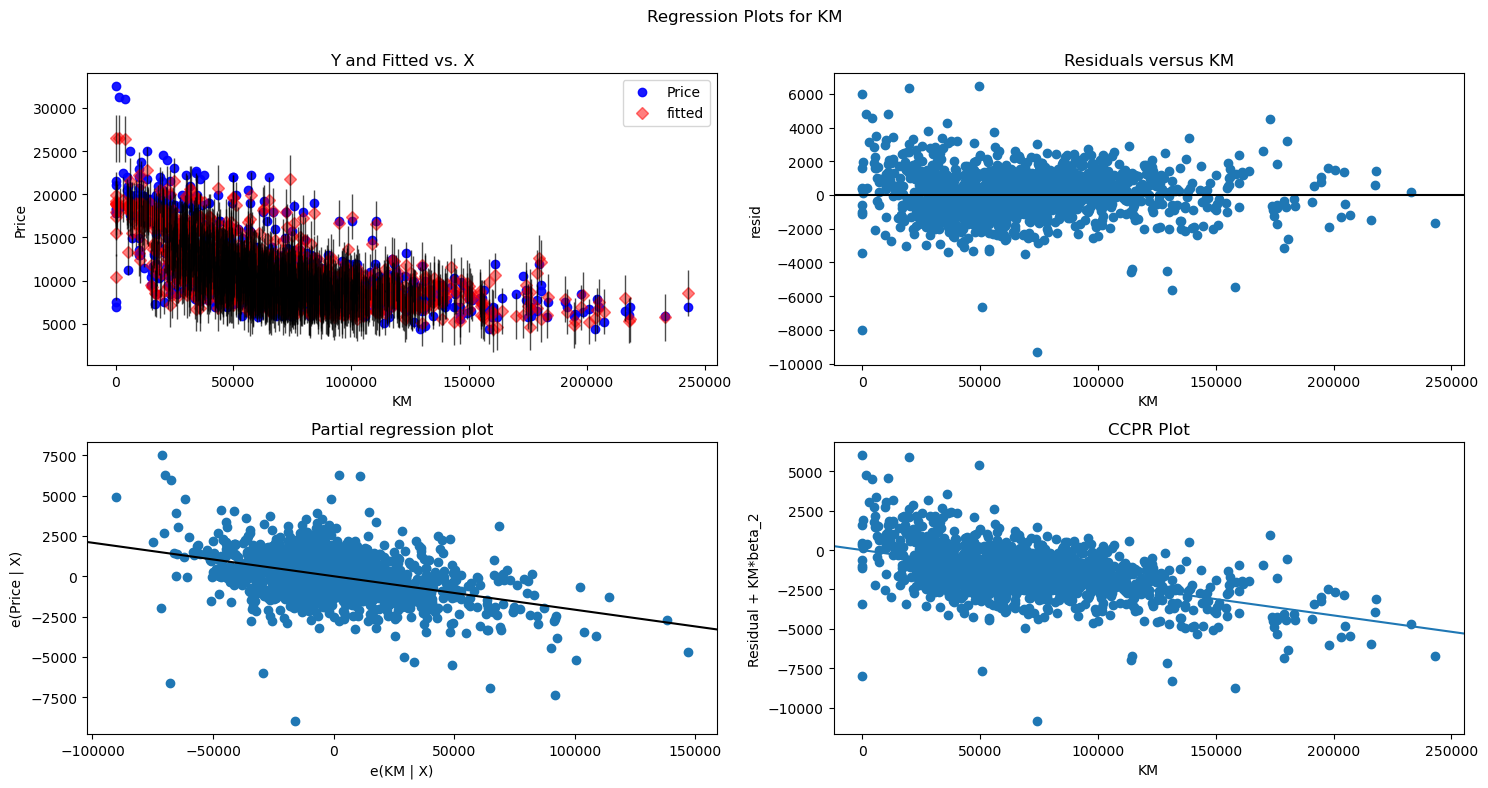

In [57]:
fig = plt.figure(figsize=(15, 8))
plot_regress_exog(model, 'KM', fig=fig)
plt.show()

eval_env: 1


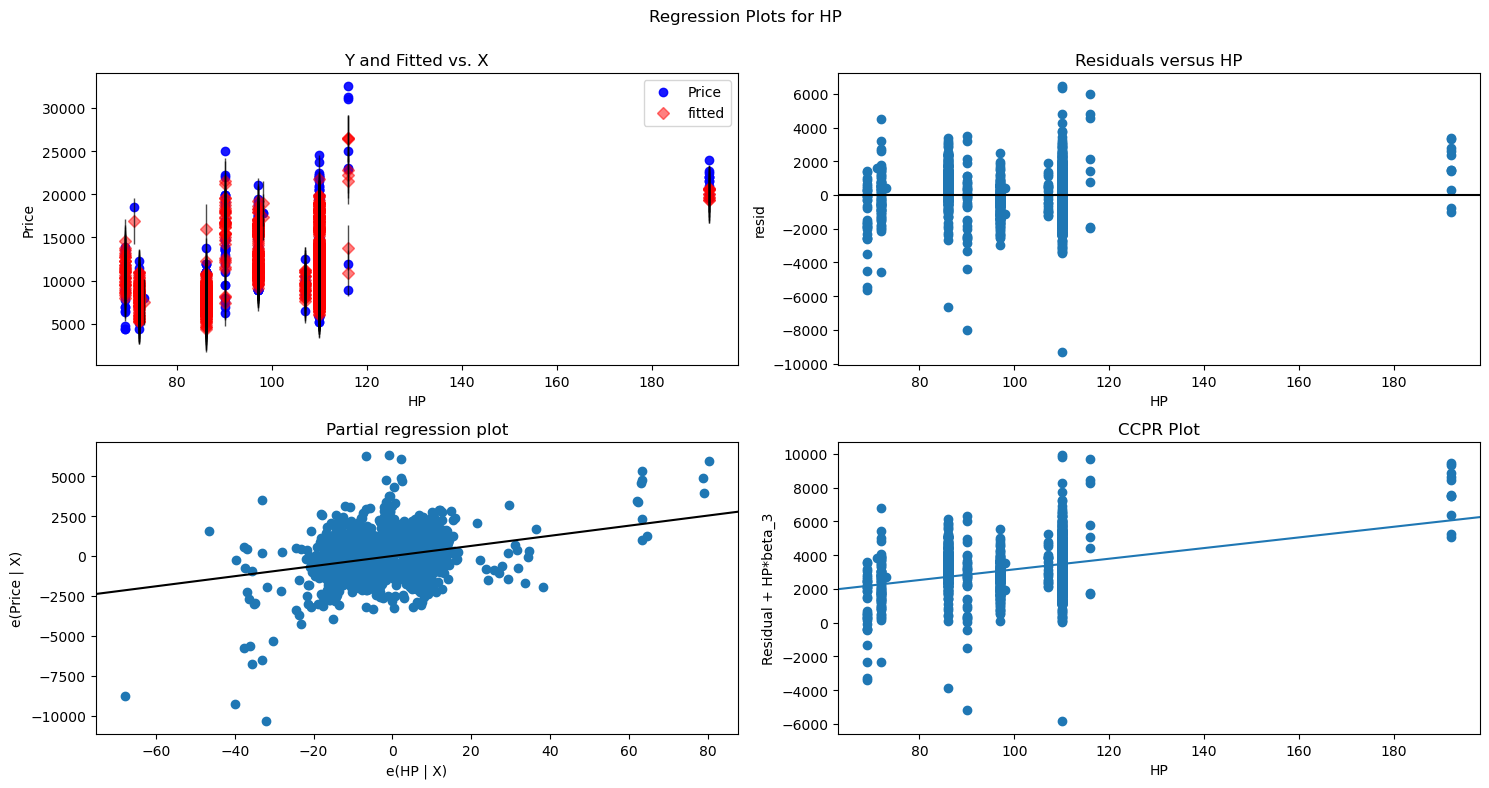

In [58]:
fig = plt.figure(figsize=(15, 8))
plot_regress_exog(model, 'HP', fig=fig)
plt.show()

eval_env: 1


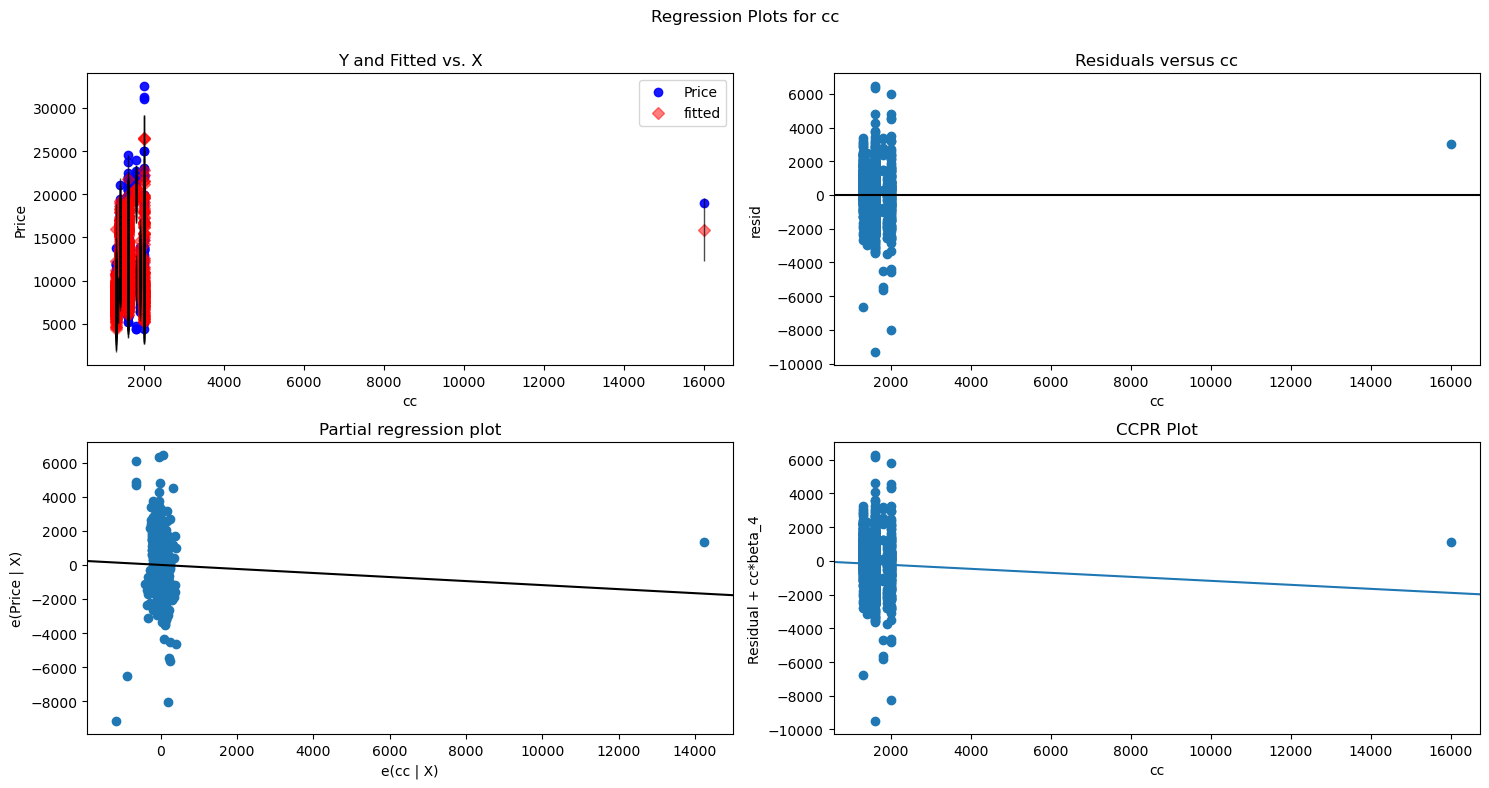

In [59]:
fig = plt.figure(figsize=(15, 8))
plot_regress_exog(model, 'cc', fig=fig)
plt.show()

eval_env: 1


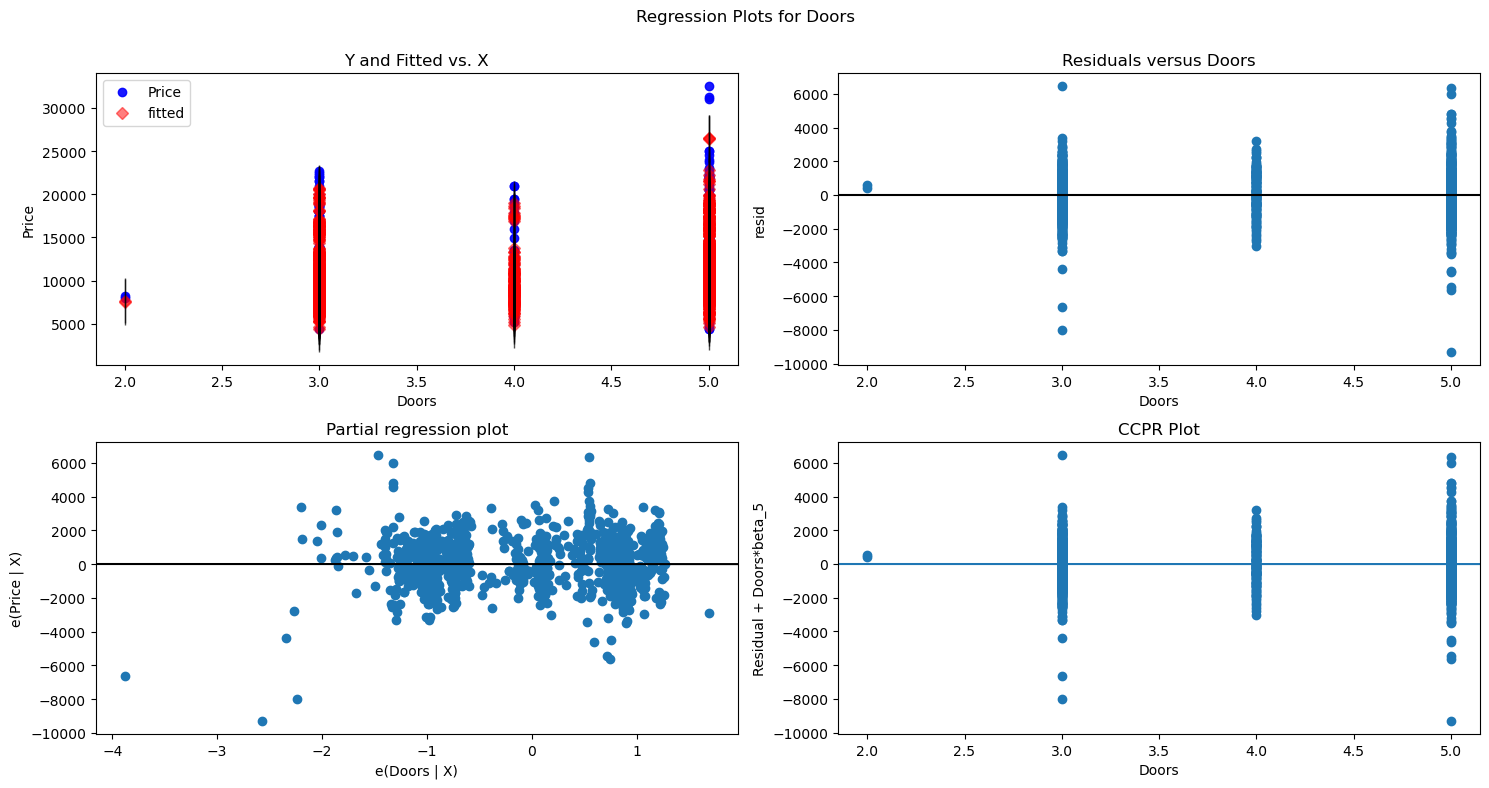

In [60]:
fig = plt.figure(figsize=(15, 8))
plot_regress_exog(model, 'Doors', fig=fig)
plt.show()

eval_env: 1


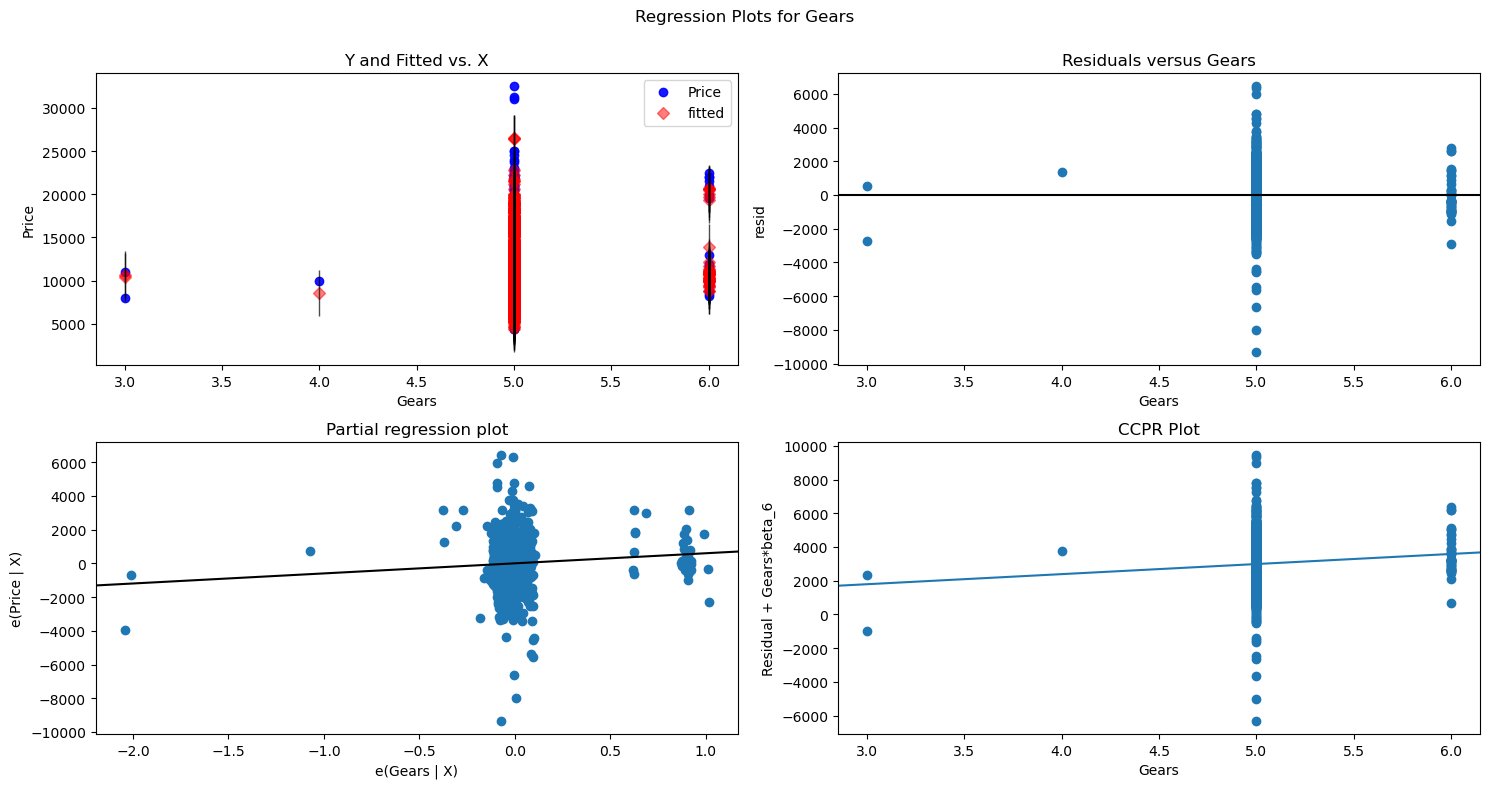

In [61]:
fig = plt.figure(figsize=(15, 8))
plot_regress_exog(model, 'Gears', fig=fig)
plt.show()

eval_env: 1


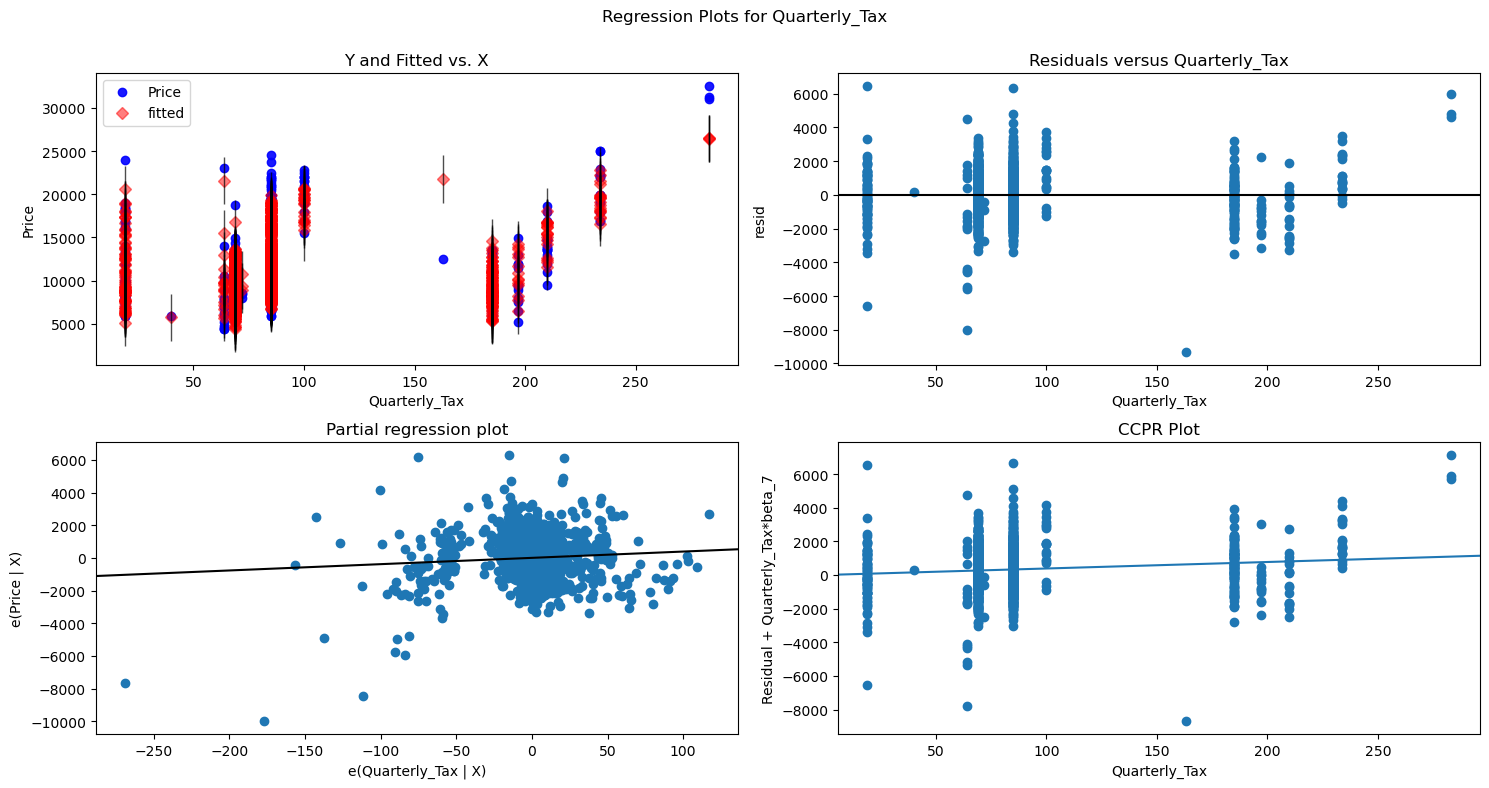

In [62]:
fig = plt.figure(figsize=(15, 8))
plot_regress_exog(model, 'Quarterly_Tax', fig=fig)
plt.show()

eval_env: 1


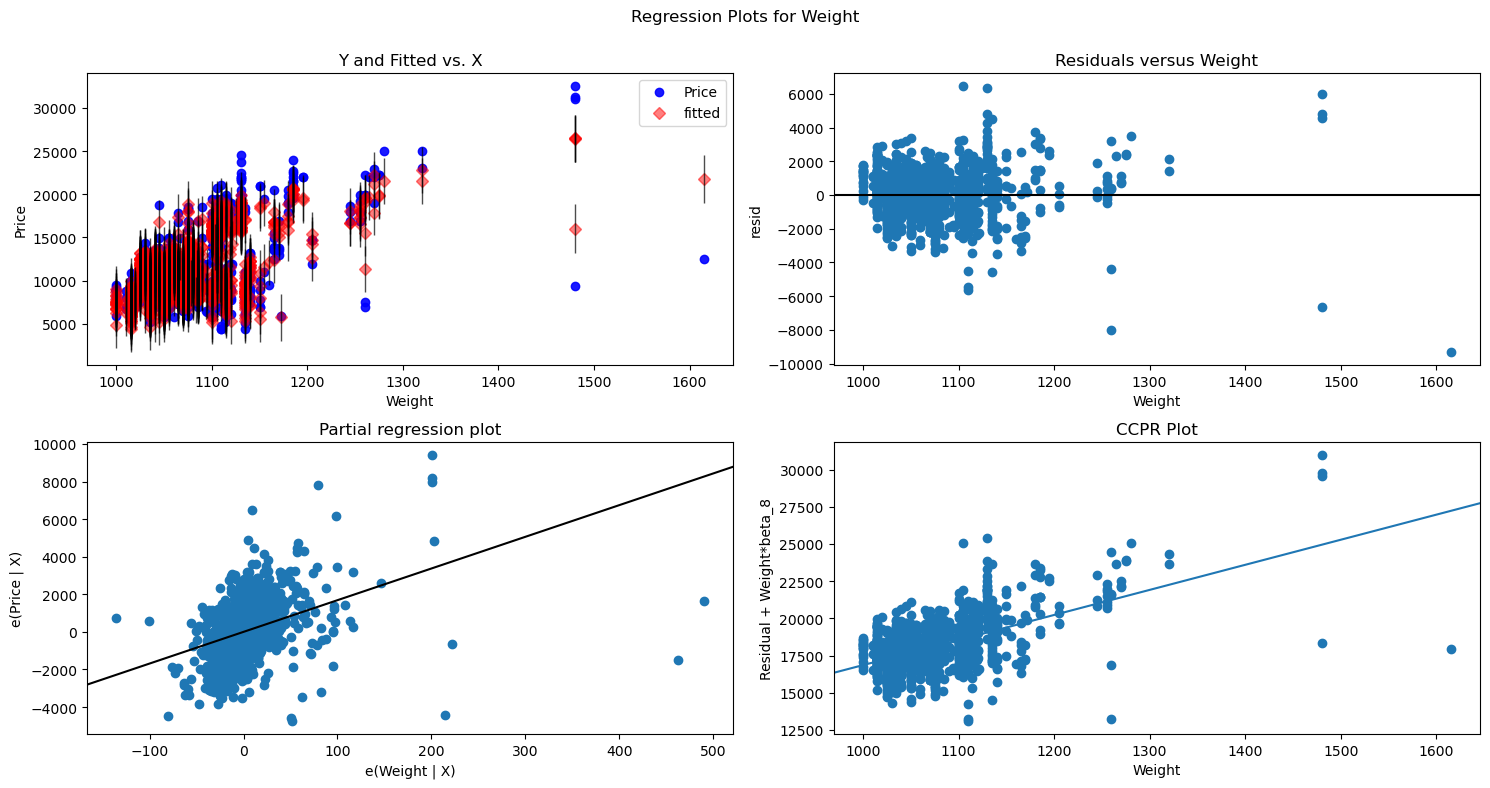

In [63]:
fig = plt.figure(figsize=(15, 8))
plot_regress_exog(model, 'Weight', fig=fig)
plt.show()

# Model deletion diagnostics (checking outliers and influencers)
## Two Techniques 1. Cook's Distance 2. Leverage Value

### 1. Cooks distance

In [64]:
# If cook's distance > 1, then it is an outlier/influencer
c = model.get_influence().cooks_distance[0]
c

array([7.22221054e-03, 3.94547973e-03, 5.44224039e-03, ...,
       8.04110550e-07, 6.99854767e-04, 1.08408002e-02])

Text(0, 0.5, "Cook's Distance")

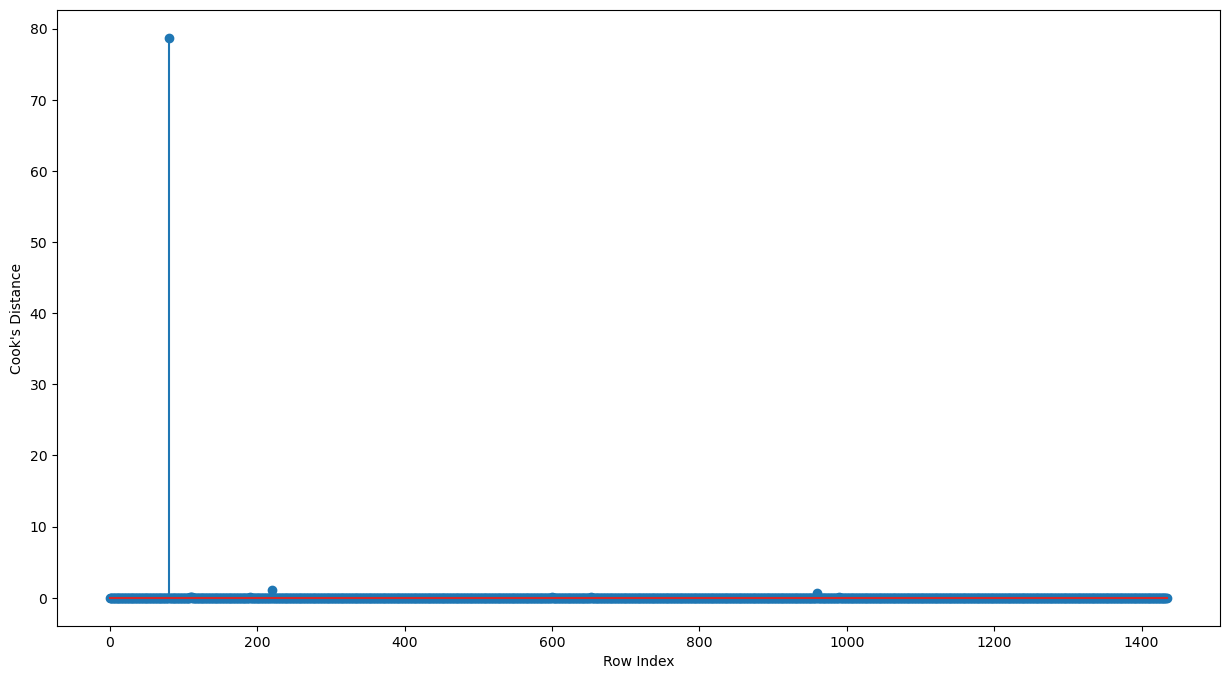

In [65]:
fig = plt.figure(figsize=(15, 8))
plt.stem(np.arange(len(df)), c)
plt.xlabel('Row Index')
plt.ylabel('Cook\'s Distance')

### 2.Leverage Value

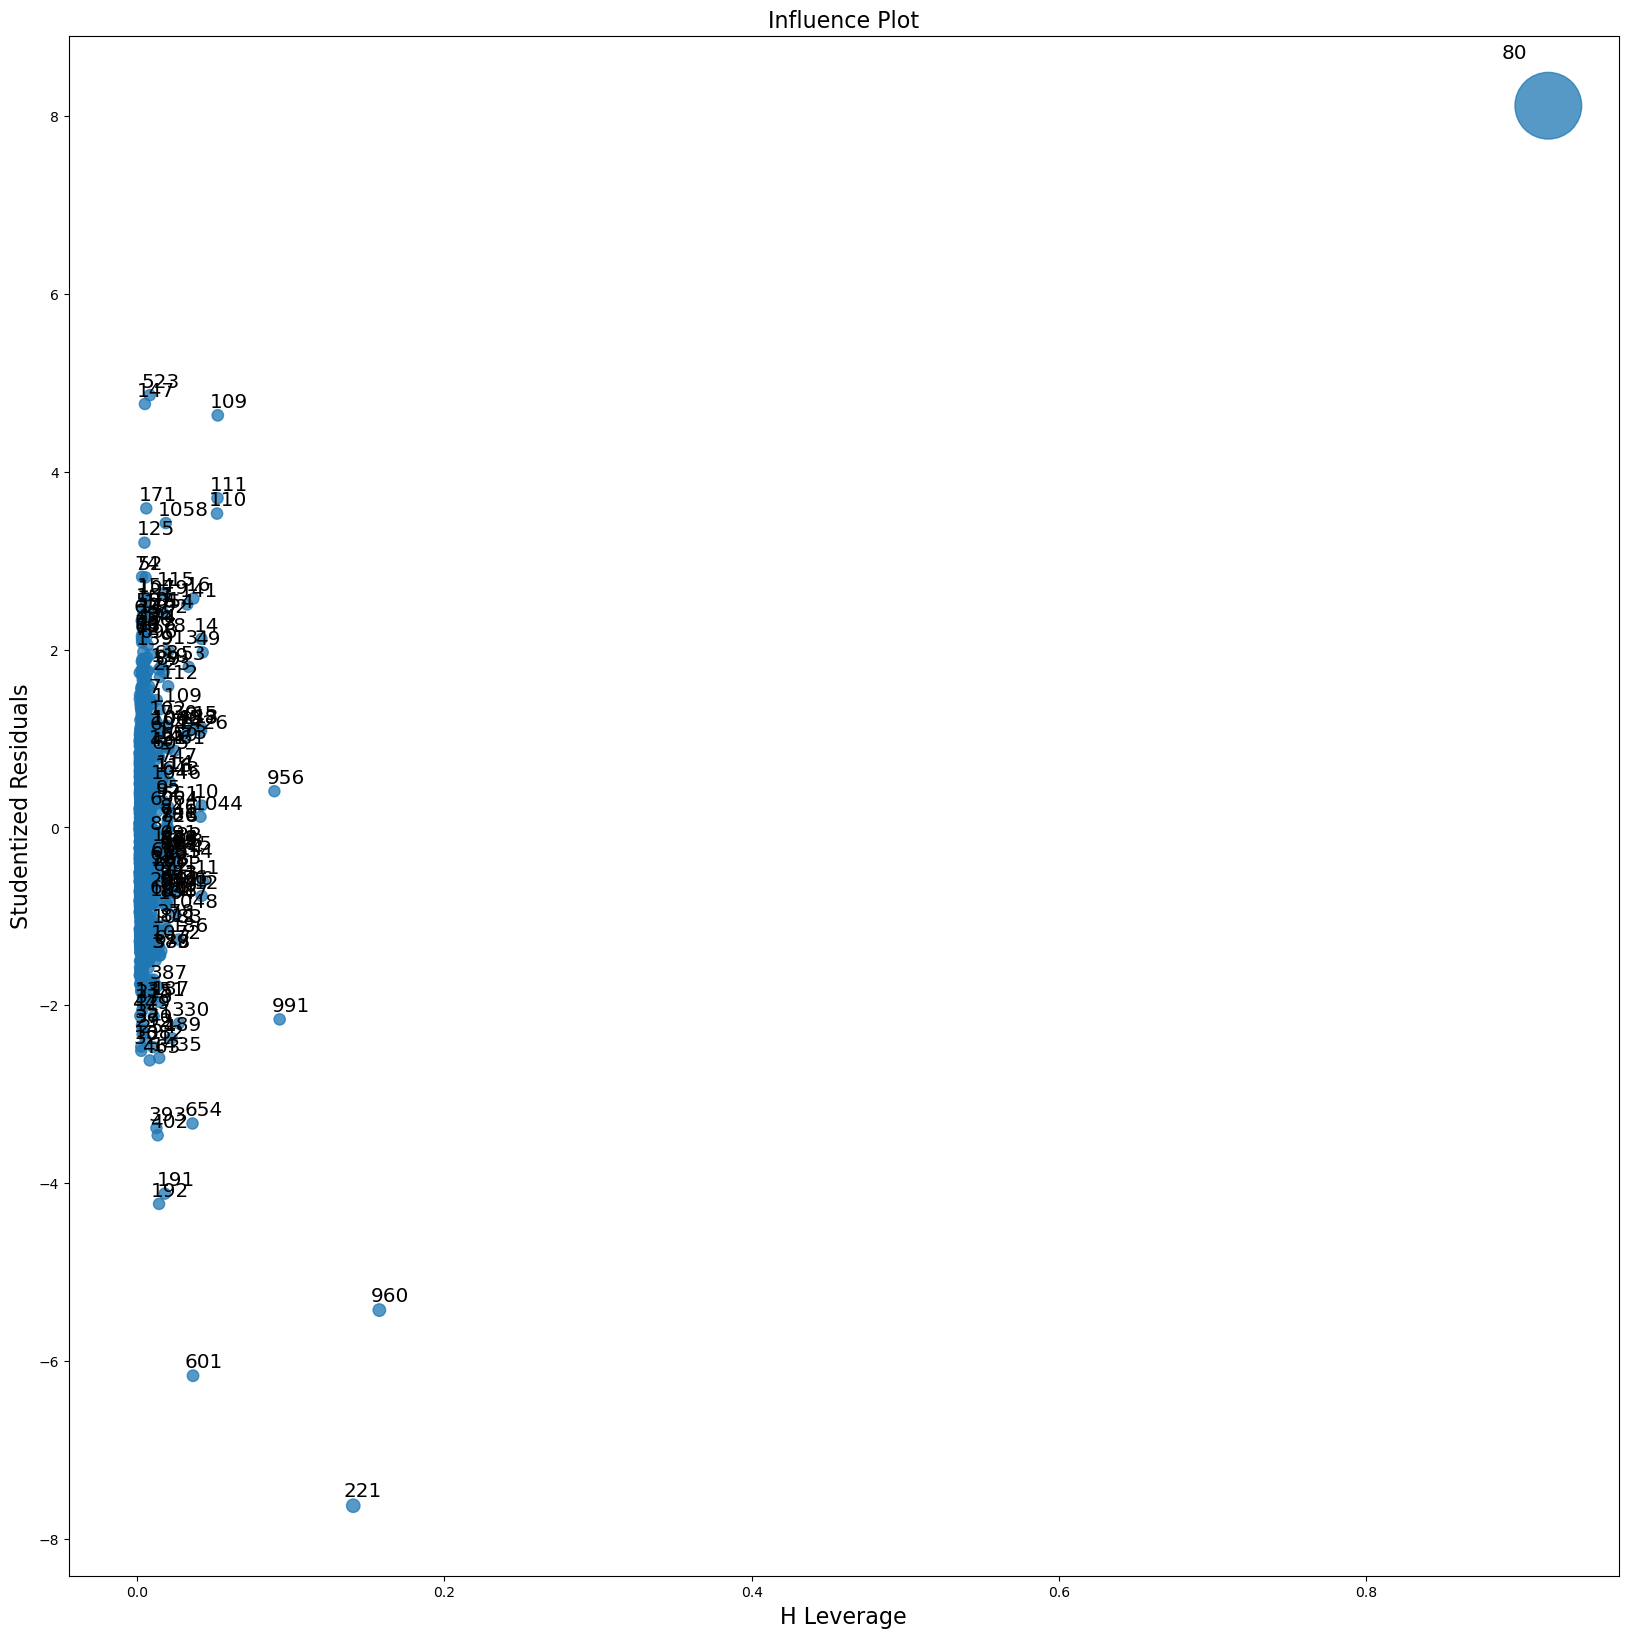

In [66]:
# Using High influence points: Points beyond cutoff value are influencers
fig, ax = plt.subplots(figsize=(20, 20))
fig = influence_plot(model, ax=ax)
plt.show()

In [67]:
k = df.shape[1]
n = df.shape[0]
cutoff = 3 * (k+1) / n
cutoff

0.020905923344947737

# Model deletion diagnostics and final model

In [68]:
while np.max(c) > 0.5:
    temp = smf.ols('Price~Age+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight', data=df).fit()
    c = temp.get_influence().cooks_distance[0]
    print(c.argmax(), c.max())
    df = df.drop(c.argmax()).reset_index(drop=True)

final_model = smf.ols('Price~Age+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight', data=df).fit()
print(f"Final model accuracy is {final_model.rsquared}")

80 78.72950582248232
219 2.225351365527139
957 2.5307796232766333
598 0.3168903540145268
Final model accuracy is 0.8882395145171204


In [69]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     1413.
Date:                Fri, 13 Jan 2023   Prob (F-statistic):               0.00
Time:                        15:05:28   Log-Likelihood:                -12182.
No. Observations:                1431   AIC:                         2.438e+04
Df Residuals:                    1422   BIC:                         2.443e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.613e+04   1423.155    -11.333      0.000   -1.89e+04   -1.33e+04
Age            -110.3700      2.445    -45.135      0.000    -115.167    -105.573
KM               -0.0177      0.001    -14.951      0.000      -0.020      -0.015
HP               34.2632      2.714     12.625      0.000      28.940      39.587
cc               -3.6790      0.297    -12.372      0.000      -4.262      -3.096
Doors          -143.5437     36.919     -3.888      0.000    -215.965     -71.122
Gears           469.5788    177.682      2.643      0.008     121.033     818.125
Quarterly_Tax     3.6472      1.363      2.676      0.008       0.973       6.321
Weight           32.1321      1.289     24.931      0.000      29.604      34.660
==============================================================================
Omnibus:                       75.132   Durbin-Watson:                   1.727
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              254.049
Skew:                           0.122   Prob(JB):                     6.82e-56
Kurtosis:                       5.050   Cond. No.                     3.49e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.49e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Predicting price

In [70]:
predicted_df = pd.DataFrame({'Actual Value': df['Price'], 'Predicted Value': final_model.predict(df)})
predicted_df.head(20)

,Actual Value,Predicted Value
0,13500,16345.352610
1,13750,15886.635544
2,13950,16328.224968
3,14950,15996.318854
4,13750,15883.424182
5,12950,15264.967942
6,16900,17632.593606
7,18600,17632.436530
8,21500,20858.294497
9,12950,13547.700232


In [71]:
metrics_df = pd.DataFrame({'R_squared': [model.rsquared, final_model.rsquared]}, index=['Original model', 'Final model'])
metrics_df

,R_squared
Original model,0.86252
Final model,0.88824
